Step 1. Importing libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Step 2. Add dataset

In [2]:
Data= pd.read_csv('../input/pak-ec-dataset/Pakistan Largest Ecommerce Dataset.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Step 3. Pre-processing
1. Understanding the Dataset.
2. Cleaning the data and removeing columns that are not required.

In [3]:
#Understanding the dataset
Data.shape
#Data.head()
Data.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [4]:
# Four columns that we need
Data.status
#Data.price
#Data.category_name_1
#Data.payment_method

0                complete
1                canceled
2                canceled
3                complete
4          order_refunded
                ...      
1048570               NaN
1048571               NaN
1048572               NaN
1048573               NaN
1048574               NaN
Name: status, Length: 1048575, dtype: object

In [5]:
Data.drop(["Unnamed: 21", "Unnamed: 22", "Unnamed: 23", "Unnamed: 24", "Unnamed: 25", "item_id", "created_at", "Year", "sales_commission_code", "discount_amount", " MV ", "BI Status", "Working Date", "M-Y", "FY", "Customer ID", "increment_id", "sku", "qty_ordered", "grand_total", "Customer Since", "Month"], axis=1, inplace=True)

Also removing NaN values

In [6]:
Data.dropna(how='all', inplace=True)

let's look into new dataset

In [7]:
# Inspecting New Dataset
Data.shape
Data.head(4000)
#Data.tail()
Data.payment_method.unique()

array(['cod', 'ublcreditcard', 'mygateway', 'customercredit',
       'cashatdoorstep', 'mcblite', 'internetbanking', 'marketingexpense',
       'productcredit', 'financesettlement', 'Payaxis', 'jazzvoucher',
       'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
       'bankalfalah', 'apg'], dtype=object)

In [8]:
#Setting labels for dataset
Data.status.unique()
Data.status.replace({"complete": 1, "received": 1, "canceled": 0, "order_refunded": 0, "refund": 0, "closed": 0, "fraud":0, "holded":0, "exchange":0, "pending_paypal":0, "paid":0, "\\N":0, "cod":0, "pending":0, "processing":0,"nan":0, "payment_review":0}, inplace=True)
Data.category_name_1.replace({"Women's Fashion":0.1, "Beauty & Grooming":0.2, "Soghaat": 0.3, "Mobiles & Tablets": 0.4, "Appliances": 0.5, "Home & Living": 0.6, "Men's Fashion":0.7, "Kids & Baby":0.8, "\\N":0.9, "Entertainment":0.11, "Computing":0.22, "Superstore":0.33, "Health & Sports":0.44, "Books":0.55, "School & Education":0.66, "Others":0.77}, inplace=True)
Data.payment_method.replace({"cod": 1.1, "ublcreditcard": 1.2, "mygateway": 1.3, "customercredit": 1.4, "cashatdoorstep": 1.5, "mcblite": 1.6, "internetbanking":1.7, "marketingexpense":1.8, "productcredit":1.9, "financesettlement":1.11, "Payaxis":1.22, "jazzvoucher":1.33, "jazzwallet":1.44, "Easypay":1.55, "Easypay_MA":1.66,"easypay_voucher":1.77, "bankalfalah":1.88, "apg":1.99}, inplace=True)

In [9]:
Data.head()
#Data.tail()
#Data.status.nunique()
#Data.category_name_1.nunique()
#Data.payment_method.nunique()
#Data.price.unique()

,status,price,category_name_1,payment_method
0,1.0,1950.0,0.1,1.1
1,0.0,240.0,0.2,1.1
2,0.0,2450.0,0.1,1.1
3,1.0,360.0,0.2,1.1
4,0.0,555.0,0.3,1.1


In [10]:
Data.head(100)
#Mean_status= Data.status.mean()
#Data= Data.fillna(0)
#D=Data.isnull().mean()
#D.plot.bar()
#Data.head(400)

,status,price,category_name_1,payment_method
0,1.0,1950.0,0.1,1.1
1,0.0,240.0,0.2,1.1
2,0.0,2450.0,0.1,1.1
3,1.0,360.0,0.2,1.1
4,0.0,555.0,0.3,1.1
...,...,...,...,...
95,1.0,320.0,0.2,1.1
96,1.0,4200.0,0.4,1.1
97,1.0,760.0,0.3,1.1
98,1.0,435.0,0.3,1.1


<AxesSubplot:>

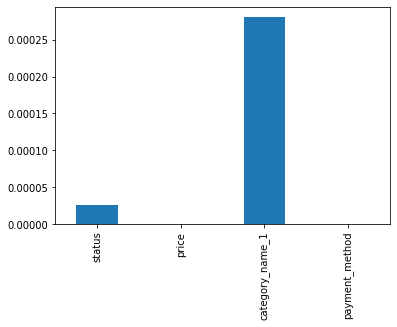

In [11]:
Data_check= Data.isnull().mean()
Data_check.plot.bar()

<AxesSubplot:>

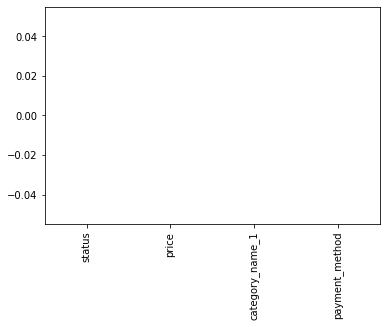

In [12]:
# Fill null values with "0"
Data= Data.fillna(0)
Data_check2= Data.isnull().mean()
Data_check2.plot.bar()

Let's look for outliers in price.

<AxesSubplot:xlabel='price'>

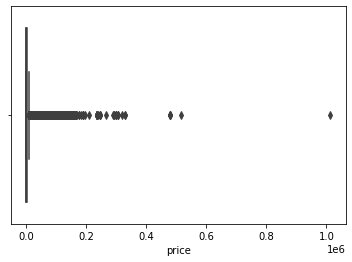

In [13]:
sns.boxplot(x= Data.price)

In [14]:
#Removing outliers

z_scores = stats.zscore(Data)


abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 10).all(axis=1)
New_Dataset = Data[filtered_entries]

<AxesSubplot:xlabel='price'>

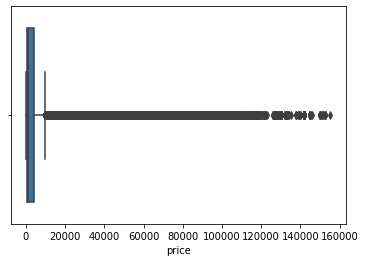

In [15]:
#check for outliers
sns.boxplot(x= New_Dataset.price)

Now since we are done with our data.
1. We have cleaned the data.
2. We have converted all categorial data into float.
3. Now we can apply ML model on Data.

In [16]:
New_Dataset.shape
New_Dataset.head(5000000)

,status,price,category_name_1,payment_method
0,1.0,1950.0,0.1,1.10
1,0.0,240.0,0.2,1.10
2,0.0,2450.0,0.1,1.10
3,1.0,360.0,0.2,1.10
4,0.0,555.0,0.3,1.10
...,...,...,...,...
584519,0.0,699.0,0.1,1.10
584520,0.0,35599.0,0.4,1.88
584521,0.0,129999.0,0.4,1.88
584522,0.0,87300.0,0.4,1.88


**ML model start here**

In [17]:
Lbls= New_Dataset.status
#Expls= New_Dataset["price"]
Exmpls = New_Dataset.loc[:,('price','category_name_1', 'payment_method')]
Exmpls.head()

,price,category_name_1,payment_method
0,1950.0,0.1,1.1
1,240.0,0.2,1.1
2,2450.0,0.1,1.1
3,360.0,0.2,1.1
4,555.0,0.3,1.1


In [18]:
#Split data for training and testing
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
Xtrain, Xtest, Ytrain, Ytest= train_test_split(Exmpls, Lbls, test_size=0.3, shuffle=True)


In [19]:
#Using supervisied learning algorithum: K nearest neigbhor
from sklearn.neighbors import KNeighborsClassifier
K_NN_model= KNeighborsClassifier(n_neighbors=5)
K_NN_model.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [20]:
# testing the model on testing data
Result=K_NN_model.predict(Xtest)
Result

array([0., 1., 0., ..., 0., 1., 1.])

In [21]:
#Calculating model accuracy
K_NN_model.score(Xtest, Ytest)

0.6707241251461655

              precision    recall  f1-score   support

         0.0       0.65      0.63      0.64     81941
         1.0       0.69      0.70      0.70     93374

    accuracy                           0.67    175315
   macro avg       0.67      0.67      0.67    175315
weighted avg       0.67      0.67      0.67    175315



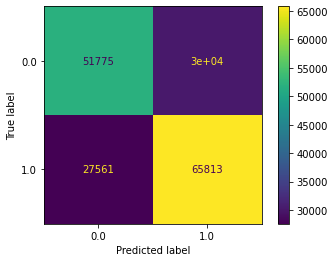

In [22]:
# Plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(K_NN_model, Xtest, Ytest)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(Ytest,Result))

Evaluting Model in terms of Overfitting and Underfitting

In [23]:
# Evaluating model as underfitting and overfitting

total_train_accuracy = []
total_test_accuracy = []
neighbors = np.arange(0,9)

In [24]:
# for loop
#for i in range (8):
#    Knn= KNeighborsClassifier(n_neighbors=i+1)
    
    # model training
#    Knn.fit(Xtrain, Ytrain)
    
    # train accuracy
#    train_accuracy= Knn.score(Xtrain,Ytrain)
    
    # test acuracy
#    test_accuracy= Knn.score(Xtest, Ytest)
    
#    total_train_accuracy.append(train_accuracy)
#    total_test_accuracy.append(test_accuracy)

In [25]:

# plotting results for model
#plt.plot(neighbors, total_test_accuracy)
#plt.plot(neighbors, total_train_accuracy)
#plt.show()